# The study for HMC BIW PROJECT  

## M/L is used to estimate the value with parameters.  
## 


In [1]:
# import libraries
from __future__ import absolute_import, division, print_function, unicode_literals

# tensorflow libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

# other utiles
import matplotlib.pyplot as plt
from  IPython import display
import numpy as np
import pandas as pd
import seaborn as sns
import pathlib

In [2]:
# check the tensorflow version
print(tf.__version__)

2.1.0


# Pre-Checking Dataframe


In [3]:
#------------------------------------------------------
# read training dataset
#------------------------------------------------------
dir = r"F:\CON_2019_HMC_PGD-MINESET\Zone5_mat590\D200"
csv = dir+r"\training200-1.csv"
dataset = pd.read_csv(csv)
dataset.head()


,Train,p1,p2,p3,p4,p5,p6,p7,p8,H100,...,H380,H400,H420,H440,H460,H480,H500,Intrusion,Area,region
0,NaN,71.13,185.78,121.63,73.53,145.40,60.59,110.696306,176.597072,38.532606,...,90.123222,89.897499,89.499919,89.037689,87.633278,87.270814,86.301571,95.123047,-1800.0,2
1,NaN,38.52,179.32,136.46,162.84,68.61,85.75,139.094664,63.577231,42.410166,...,90.171586,89.918283,89.747458,89.473657,88.242158,88.130937,87.367541,95.264832,-2570.0,2
2,NaN,42.80,86.68,161.36,159.18,183.72,60.82,132.972692,191.975947,40.562675,...,90.052168,89.768574,89.731943,89.291525,88.006275,87.689786,86.866545,95.825012,-1180.0,2
3,NaN,82.34,113.99,91.96,105.58,119.29,97.47,192.221351,191.168019,41.873392,...,90.125823,89.963414,89.764813,89.282533,87.884195,87.502083,86.597262,96.426209,-1040.0,2
4,NaN,34.52,74.90,194.88,128.46,163.16,181.14,131.464205,190.331035,40.336993,...,89.642012,89.310387,89.420464,89.048659,87.782013,87.491669,86.735146,96.475525,-355.0,2


In [4]:
# extract the columns from the dataset
column_names = dataset.columns
print("parameters      : {}".format(column_names[1:9]))
print("output_curves   : {}".format(column_names[9:30]))
print("output_Intrusion: {}".format(column_names[30]))
print("output_Area     : {}".format(column_names[31]))
print("output_region   : {}".format(column_names[32]))


parameters      : Index(['p1', 'p2', 'p3', 'p4', 'p5', 'p6', 'p7', 'p8'], dtype='object')
output_curves   : Index(['H100', 'H120', 'H140', 'H160', 'H180', 'H200', 'H220', 'H240', 'H260',
       'H280', 'H300', 'H320', 'H340', 'H360', 'H380', 'H400', 'H420', 'H440',
       'H460', 'H480', 'H500'],
      dtype='object')
output_Intrusion: Intrusion
output_Area     : Area
output_region   : region


In [5]:
# pop of first column: train Maker
dataset.pop(column_names[0])
dataset.head()


,p1,p2,p3,p4,p5,p6,p7,p8,H100,H120,...,H380,H400,H420,H440,H460,H480,H500,Intrusion,Area,region
0,71.13,185.78,121.63,73.53,145.40,60.59,110.696306,176.597072,38.532606,45.530948,...,90.123222,89.897499,89.499919,89.037689,87.633278,87.270814,86.301571,95.123047,-1800.0,2
1,38.52,179.32,136.46,162.84,68.61,85.75,139.094664,63.577231,42.410166,48.762125,...,90.171586,89.918283,89.747458,89.473657,88.242158,88.130937,87.367541,95.264832,-2570.0,2
2,42.80,86.68,161.36,159.18,183.72,60.82,132.972692,191.975947,40.562675,47.621890,...,90.052168,89.768574,89.731943,89.291525,88.006275,87.689786,86.866545,95.825012,-1180.0,2
3,82.34,113.99,91.96,105.58,119.29,97.47,192.221351,191.168019,41.873392,49.147551,...,90.125823,89.963414,89.764813,89.282533,87.884195,87.502083,86.597262,96.426209,-1040.0,2
4,34.52,74.90,194.88,128.46,163.16,181.14,131.464205,190.331035,40.336993,47.338199,...,89.642012,89.310387,89.420464,89.048659,87.782013,87.491669,86.735146,96.475525,-355.0,2


In [6]:
# Checking: min/max for each dataset
lst_max = (dataset.max(0))
lst_min = (dataset.min(0))
print("max={}, min={} of first Column".format(lst_max[-3],lst_min[-3] ))

max=127.4129639, min=95.12304688 of first Column


In [7]:
# Define functions

def norm(x):
  return (x - train_stats['mean']) / train_stats['std']

model = None
def build_model(iunit, ounit):
    model = keras.Sequential([
      layers.Dense(iunit, activation='relu', 
                   kernel_regularizer=keras.regularizers.l2(0.01), 
                   input_shape=[len(train_dataset.keys())]),
      layers.Dense(iunit, activation='relu', 
                   kernel_regularizer=keras.regularizers.l2(0.001)
                   ), 
      layers.Dense(ounit)
      ])
    #optimizer = tf.keras.optimizers.RMSprop(lr=0.01, rho=0.9, epsilon=None, decay=0.0)
    #optimizer = tf.keras.optimizers.Adagrad(lr=0.01, epsilon=None, decay=0.0)
    #optimizer = tf.keras.optimizers.SGD(lr=0.01, momentum=0.0, decay=0.0, nesterov=False)
    #optimizer = tf.keras.optimizers.Adadelta(lr=1.0, rho=0.95, epsilon=None, decay=0.0)
    optimizer = tf.keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
    #optimizer = tf.keras.optimizers.Adamax(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0)
    #optimizer = tf.keras.optimizers.Nadam(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=None, schedule_decay=0.004)
    
    model.compile(
      loss='mse',
      optimizer=optimizer,
      # 'mae', 'mse', 'mape',
      metrics=['mse'])

    return model  

# Training
def training(EPOCHS=1000, model=model, normed_train_data=None, train_labels=None):
    history = model.fit(
                          normed_train_data, train_labels,
                          epochs=EPOCHS, validation_split = 0.2, verbose=0,
                          callbacks=[tfdocs.modeling.EpochDots()]
                          )
    print("% : Training : end", model)
    # early stop by val_mae
    early_stop = keras.callbacks.EarlyStopping(monitor='mse', patience=1000)
    early_history = model.fit(normed_train_data, train_labels, 
                    epochs=EPOCHS, validation_split = 0.2, verbose=0, 
                    callbacks=[early_stop, tfdocs.modeling.EpochDots()])                  
    return model, history, early_history        

# M/L model

In [8]:
train_dataset = dataset.sample(frac=0.7)
test_dataset  = dataset.drop(train_dataset.index)
train_dataset.head()


,p1,p2,p3,p4,p5,p6,p7,p8,H100,H120,...,H380,H400,H420,H440,H460,H480,H500,Intrusion,Area,region
18,57.50,128.94,157.66,131.78,50.59,117.83,136.837303,108.241980,43.349538,49.870338,...,92.682094,92.415920,92.276032,91.972107,90.742096,90.615923,89.788996,98.348572,-3480.0,2
148,135.36,129.53,89.99,141.81,59.32,179.97,35.391538,161.441345,39.942063,47.636505,...,98.754672,98.838513,99.436531,98.550295,97.021593,96.166200,94.929722,108.956360,-5990.0,3
195,167.35,87.26,114.15,29.80,134.42,145.70,176.106913,60.573016,42.369964,53.898308,...,111.174895,110.277346,108.497436,106.524435,104.069101,102.073090,99.872775,122.846069,-7120.0,3
183,63.34,89.22,47.54,80.08,151.40,70.54,76.732715,97.024187,40.081320,48.653049,...,105.451402,104.109802,103.951242,103.336952,101.972206,101.467969,100.486329,115.838623,-6840.0,3
65,118.59,174.48,144.95,181.57,173.93,168.57,120.525988,184.290054,40.537493,48.109550,...,95.328742,95.220632,95.727985,95.068536,93.710513,93.138181,92.104584,101.695679,-3470.0,3


In [9]:
# # make an instance for dataframe as "train_stats"
train_stats = train_dataset.describe()
train_stats.head()


,p1,p2,p3,p4,p5,p6,p7,p8,H100,H120,...,H380,H400,H420,H440,H460,H480,H500,Intrusion,Area,region
count,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,...,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000
mean,112.080145,117.386812,111.388333,110.731522,115.399855,115.554058,113.135872,115.843368,41.089787,48.963363,...,97.956834,97.750079,97.647188,96.996202,95.548214,94.989461,93.897739,105.322484,-5202.681159,2.637681
std,50.512963,48.677642,49.832043,50.172128,49.887118,48.728720,47.285502,49.842274,2.124330,2.127743,...,4.715053,4.612376,4.458590,4.226807,4.079461,3.863717,3.701808,6.077214,2084.498763,0.578723
min,25.150000,25.850000,25.330000,25.430000,31.700000,30.330000,30.740243,30.917086,36.323435,43.530597,...,90.052168,89.768574,89.499919,89.037689,87.633278,87.270814,86.301571,95.123047,-10000.000000,1.000000
25%,66.115000,80.515000,66.105000,72.112500,72.462500,73.517500,73.244164,70.589672,39.631717,47.392315,...,94.408357,94.287950,94.215466,93.901374,92.625767,92.227174,91.051148,100.752365,-6840.000000,2.000000


In [10]:
# # delete "Area" column from "train_stats"
for col in column_names[9:33]:
    train_stats.pop(col)

train_stats = train_stats.transpose()



In [11]:
train_stats

,count,mean,std,min,25%,50%,75%,max
p1,138.0,112.080145,50.512963,25.150000,66.115000,110.290000,156.662500,198.260000
p2,138.0,117.386812,48.677642,25.850000,80.515000,119.750000,158.085000,199.200000
p3,138.0,111.388333,49.832043,25.330000,66.105000,114.525000,152.127500,199.130000
p4,138.0,110.731522,50.172128,25.430000,72.112500,104.575000,155.772500,199.750000
p5,138.0,115.399855,49.887118,31.700000,72.462500,116.065000,154.785000,199.470000
p6,138.0,115.554058,48.728720,30.330000,73.517500,117.490000,154.815000,198.360000
p7,138.0,113.135872,47.285502,30.740243,73.244164,113.541284,151.291468,199.983481
p8,138.0,115.843368,49.842274,30.917086,70.589672,115.411893,161.302989,198.459481


In [12]:
# make instances for dataset without the QoI
train_labels_Intr = pd.DataFrame(None)
test_labels__Intr = pd.DataFrame(None)
train_labels_Area = pd.DataFrame(None)
test_labels__Area = pd.DataFrame(None)

# for i in range(9,33):
#     train_labels[column_names[i]]=train_dataset.pop(column_names[i])
#     test_labels[column_names[i]]=test_dataset.pop(column_names[i])

for i in range(9,33):
    if i == 30:
        train_labels_Intr[column_names[i]] = train_dataset.pop(column_names[i])
        test_labels__Intr[column_names[i]] = test_dataset.pop(column_names[i]) 
    elif i == 31:
        train_labels_Area[column_names[i]] = train_dataset.pop(column_names[i])
        test_labels__Area[column_names[i]] = test_dataset.pop(column_names[i])  
    else:
        train_dataset.pop(column_names[i])
        test_dataset.pop(column_names[i])

normed_train_data = norm( train_dataset )
normed_test_data  = norm( test_dataset )

   
# normed_train_data_Area = norm( train_labels_Area )
# normed_test_data_Area  = norm(  test_labels__Area )



In [13]:
train_dataset.head()

,p1,p2,p3,p4,p5,p6,p7,p8
18,57.50,128.94,157.66,131.78,50.59,117.83,136.837303,108.241980
148,135.36,129.53,89.99,141.81,59.32,179.97,35.391538,161.441345
195,167.35,87.26,114.15,29.80,134.42,145.70,176.106913,60.573016
183,63.34,89.22,47.54,80.08,151.40,70.54,76.732715,97.024187
65,118.59,174.48,144.95,181.57,173.93,168.57,120.525988,184.290054


In [14]:
test_dataset.head()

,p1,p2,p3,p4,p5,p6,p7,p8
1,38.52,179.32,136.46,162.84,68.61,85.75,139.094664,63.577231
3,82.34,113.99,91.96,105.58,119.29,97.47,192.221351,191.168019
4,34.52,74.90,194.88,128.46,163.16,181.14,131.464205,190.331035
6,72.28,119.87,123.10,186.59,157.50,33.39,155.325806,86.709135
13,130.47,170.81,42.53,99.31,147.68,157.58,142.113299,172.680202


In [15]:
# # create the model instance 
EPOCHS = 10000
nPar = 8
nOut = 1
iunit = nPar * nOut
ounit = nOut
print("nPar: {}, nOut: {}, iunit: {}, ounit: {}".format(nPar,nOut,iunit,ounit))
model_Intr = build_model(iunit, ounit)
model_Intr, model_Intr_history, model_Intr_early_history = training(EPOCHS, model_Intr, normed_train_data, train_labels_Intr)

model_Intr.save(r'F:\CON_2019_HMC_PGD-MINESET\Zone5_mat590\machineLearning\trainingdata_Intr_for_Zone.h5')

........................................
Epoch: 8900, loss:9.2230,  mse:8.9228,  val_loss:57.2046,  val_mse:56.9045,  
....................................................................................................
Epoch: 9000, loss:9.2183,  mse:8.9180,  val_loss:56.4645,  val_mse:56.1642,  
....................................................................................................
Epoch: 9100, loss:9.1751,  mse:8.8744,  val_loss:55.9271,  val_mse:55.6264,  
....................................................................................................
Epoch: 9200, loss:9.1307,  mse:8.8292,  val_loss:57.2455,  val_mse:56.9439,  
....................................................................................................
Epoch: 9300, loss:9.0964,  mse:8.7950,  val_loss:56.8435,  val_mse:56.5420,  
....................................................................................................
Epoch: 9400, loss:9.0672,  mse:8.7653,  val_loss:55.8625,  val_m

In [16]:
test_mae_score_Intr, test_mae_score1_Intr = model_Intr.evaluate(  normed_test_data, test_labels__Intr  )
print(test_mae_score_Intr, test_mae_score1_Intr)


59/59 [==============================] - 0s 51us/sample - loss: 65.8118 - mse: 65.5142
65.81181335449219 65.51422


Text(0, 0.5, 'MSE')

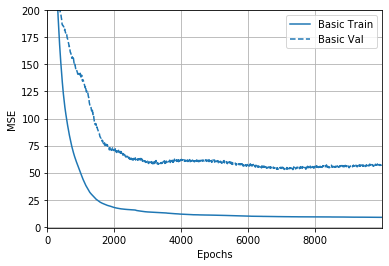

In [19]:
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)
plotter.plot({'Basic': model_Intr_history}, metric = "mse")
plt.ylim([-1, 200])
plt.ylabel('MSE')

In [18]:
EPOCHS = 10000
nPar = 8
nOut = 1
iunit = nPar * nOut
ounit = nOut
print("nPar: {}, nOut: {}, iunit: {}, ounit: {}".format(nPar,nOut,iunit,ounit))
model_Area = build_model(iunit, ounit)
model_Area, model_Area_history, model_Area_early_history = training(EPOCHS, model_Area, normed_train_data, train_labels_Area)

model_Area.save(r'F:\CON_2019_HMC_PGD-MINESET\Zone5_mat590\machineLearning\trainingdata_Area_for_Zone.h5')

.........% : Training : end <tensorflow.python.keras.engine.sequential.Sequential object at 0x0000028473B429C8>

Epoch: 0, loss:367960.6705,  mse:367951.7812,  val_loss:1934564.0000,  val_mse:1934555.1250,  
....................................................................................................
Epoch: 100, loss:365576.2111,  mse:365567.3125,  val_loss:1928628.1250,  val_mse:1928619.2500,  
....................................................................................................
Epoch: 200, loss:363044.7676,  mse:363035.8438,  val_loss:1956996.7500,  val_mse:1956987.7500,  
....................................................................................................
Epoch: 300, loss:360772.3636,  mse:360763.4062,  val_loss:1954230.7500,  val_mse:1954221.7500,  
....................................................................................................
Epoch: 400, loss:358462.2977,  mse:358453.3125,  val_loss:1979354.1250,  val_mse:1979345.1250,  


In [20]:
test_mae_score_Area, test_mae_score1_Area = model_Area.evaluate(  normed_test_data, test_labels__Area  )
print(test_mae_score_Area, test_mae_score1_Area)

59/59 [==============================] - 0s 68us/sample - loss: 2503201.4619 - mse: 2503190.5000
2503201.4618644067 2503190.5


Text(0, 0.5, 'MSE_AREA')

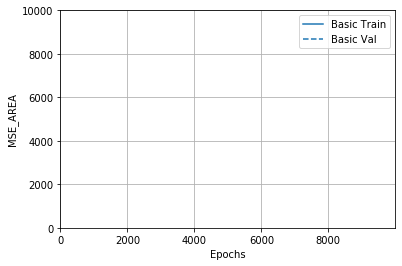

In [35]:
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)
plotter.plot({'Basic': model_Area_history}, metric = "mse")
plt.ylim([-1, 10000])
plt.ylabel('MSE_AREA')

In [22]:
# plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)
# plotter.plot({'Early Stopping': early_history}, metric = "mae")
# plt.ylim([-1, 10])
# plt.ylabel('MAE')

In [23]:
# study for dataframe
# data = {'a':[1,2,3.0],'b':[0.1,0.2,0.3],'sub':['1st','2nd','3nd']}
# df = pd.DataFrame(data)
# df
# df = pd.DataFrame(data, columns=['sub','a','b'])
# df
# df = df.reindex(index = [0,2,1])
# df
# df['c']=np.nan
# df
# df.loc[:,['c']]=[1,2,3]
# df

In [24]:
# model evaluate by curve
# model = keras.models.load_model(r'F:\CON_2019_HMC_PGD-MINESET\Zone5_mat590\machineLearning\trainingdata_for_Zone.h5')
# test_predictions = model.predict(normed_test_data).flatten()
# test_predictions = model.predict(normed_test_data)
# print("normed_test_data: {}".format(normed_test_data))
# print("test_dataset    : {}".format(test_dataset))
# print("test_predictions: {}".format(test_predictions))


# Optimization

In [25]:
import pandas as pd
import numpy as np
import os
from tensorflow.keras.models import Sequential, load_model
from scipy import optimize
import time


In [26]:
# Number of Curve points
point = 39
# Number of variables 
var = 8

In [27]:
# predict_func
# Mean square error between test and prediction

def predict_func( lst ):
    import math
    # # Result of prediction data  
    
    lstVar  = [ var  for var  in lst    ]

    lstVarN = [ norm(varN) for varN in lstVar ]

    predict_Intr = model_Intr.predict( [lstVarN] )[0]
    predict_Area = model_Area.predict( [lstVarN] )[0]

    # cVal = 0
    # sInt = 0 
    # sAre = 0
    # sReg = 0

    # for i in range(0,len(predict)):
    #     if i <= 20: # curve data
    #         cVal = cVal + predict[i]
    #     if i == 21: # max. intrusion
    #         sInt = predict[i]
    #     if i == 22: # area
    #         sAre = predict[i]
    #     if i == 23: # region
    #         sReg = predict[i]

    # lst_max = (dataset.max(0))
    # lst_min = (dataset.min(0))
    # print("max={}, min={} of first Column".format(lst_max[1],lst_min[1] ))

    norm_Int  = math.sqrt( ((predict_Intr - lst_min[29])/(lst_max[29] - lst_min[29]))**2 ) 
    norm_Area = math.sqrt( ((predict_Area - lst_min[30])/(lst_max[30] - lst_min[30]))**2 ) 
    # print("min: {}, max: {}".format(lst_min[30], lst_max[30]))
    print("parameter: {}".format(lstVar))
    print("Intursion: {}, Area: {}".format(predict_Intr, predict_Area))

    # weight1 = 0.2


    return  0.9 * norm_Int + 0.1 * norm_Area


In [28]:
# 1st
bnds = [( 25, 200 ), ( 25, 200 ), ( 25, 200 ), ( 25, 200 ),
        ( 30, 200 ), ( 30, 200 ), ( 30, 200 ), ( 30, 200 )
]
from scipy import optimize
# best1bin
result_best1bin = optimize.differential_evolution(predict_func, bnds, strategy='best1bin', init='latinhypercube')
print("DONE!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!")


], Area: [-5591.404]
parameter: [149.43252146979327, 71.21151127173108, 140.93208052037517, 110.59113669580988, 139.95462165454248, 164.01814148826264, 110.93822543113457, 183.7872088331313]
Intursion: [95.15018], Area: [-5592.55]
parameter: [149.4044172556014, 137.05360455982327, 125.20862610098335, 90.7588413344312, 76.05799855403541, 155.24593554218018, 75.0512385528408, 138.87695843853655]
Intursion: [95.122856], Area: [-5591.6353]
parameter: [149.39544416063632, 65.15099112161496, 77.38550266132762, 116.78588553944515, 40.80983107241053, 186.80983403303418, 140.35084552158204, 51.25886909131209]
Intursion: [95.114136], Area: [-5591.3433]
parameter: [149.4043012610855, 195.96853336539442, 150.62209095196607, 44.10063419891277, 100.64369472837944, 128.44512898537704, 71.9391627604068, 92.48020325868654]
Intursion: [95.12274], Area: [-5591.631]
parameter: [149.40368033257687, 131.89767082613974, 162.5004509514982, 56.12172215397919, 78.53704649198129, 120.35158707862135, 110.74316279

In [29]:
# Get minimize parameters
minimum_best1bin_x = result_best1bin.x
minimum_best1bin_f = result_best1bin.fun
minimum_best1bin_x, minimum_best1bin_f

(array([149.4046176 , 177.81676748,  82.05677218,  88.31015502,
        102.17639908,  71.59440126, 151.5928084 , 158.66235858]),
 0.04680911679386716)

In [30]:
#Second
bnds = [( 25, 200 ), ( 25, 200 ), ( 25, 200 ), ( 25, 200 ),
        ( 30, 200 ), ( 30, 200 ), ( 30, 200 ), ( 30, 200 )
]
from scipy import optimize
# best1bin
result_best1bin = optimize.differential_evolution(predict_func, bnds, strategy='best1bin', init='latinhypercube')
print("DONE!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!")

 173.43494012978408]
Intursion: [95.12113], Area: [-5591.5776]
parameter: [149.40628866541567, 62.42294492289874, 129.80429655492227, 101.64816589458357, 121.10461821624621, 73.71492092203016, 177.35008911198685, 50.37862279771649]
Intursion: [95.12468], Area: [-5591.6963]
parameter: [149.38583154882807, 45.90942026993616, 140.62612405819064, 81.4325317489223, 98.1741027562804, 87.67795855513594, 107.45751940790147, 41.301268601255245]
Intursion: [95.1048], Area: [-5591.0312]
parameter: [149.43864467893607, 92.290074955737, 128.81470570867987, 157.61595183602094, 125.43321618397873, 132.40124466908293, 174.27501577758605, 56.758143785832104]
Intursion: [95.15613], Area: [-5592.7495]
parameter: [149.40786807010284, 56.75096937146027, 143.87191610858383, 79.14546984632977, 138.77922175165563, 48.070694014414954, 90.99599968300784, 58.73003353520657]
Intursion: [95.126205], Area: [-5591.748]
parameter: [149.39231330053457, 56.47383570261327, 144.44571119508993, 154.40134727784735, 37.3231

In [31]:
# 2nd: Get minimize parameters
minimum_best1bin_x = result_best1bin.x
minimum_best1bin_f = result_best1bin.fun
minimum_best1bin_x, minimum_best1bin_f

(array([149.40478302,  67.06659842, 142.20919446, 129.83861364,
        128.31508669, 100.85719288, 198.1500832 ,  49.69141633]),
 0.04681374416239182)

In [32]:
#Third
bnds = [( 25, 200 ), ( 25, 200 ), ( 25, 200 ), ( 25, 200 ),
        ( 30, 200 ), ( 30, 200 ), ( 30, 200 ), ( 30, 200 )
]
from scipy import optimize
# best1bin
result_best1bin = optimize.differential_evolution(predict_func, bnds, strategy='best1bin', init='latinhypercube')
print("DONE!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!")

ea: [-5589.9756]
parameter: [149.42605406264087, 90.66701087883183, 129.50121674033113, 65.23195792183373, 67.92018610892382, 50.63059143711564, 123.42564910930939, 141.20920075980584]
Intursion: [95.14389], Area: [-5592.3394]
parameter: [149.41348876141853, 176.63116047799258, 66.90205724600534, 99.88235525334399, 38.58217599389556, 32.47115335357158, 49.88597556509559, 162.7978700785682]
Intursion: [95.131676], Area: [-5591.9307]
parameter: [149.4123438000313, 188.6215701187209, 165.7014048532264, 179.0610584500607, 133.0651849026221, 30.676394025669936, 70.99940599530862, 171.72377610652237]
Intursion: [95.13057], Area: [-5591.8936]
parameter: [149.39685176230554, 138.83688056751723, 197.97180765943796, 148.11278376079574, 60.39363093629338, 148.86394129251505, 111.60036641037378, 171.80022745992474]
Intursion: [95.11551], Area: [-5591.3887]
parameter: [149.46734919652894, 119.27900667105962, 62.65346663178136, 102.75432467195877, 34.64198102354682, 105.05401995735747, 115.838156876

In [33]:
# 3nd: Get minimize parameters
minimum_best1bin_x = result_best1bin.x
minimum_best1bin_f = result_best1bin.fun
minimum_best1bin_x, minimum_best1bin_f

(array([149.4046024 , 185.30117557, 173.98730257, 136.72333771,
         37.74238503,  39.09644032, 102.38979916, 178.89388529]),
 0.04680955005260052)

In [34]:
# normed_test_data

# test_predictions = model.predict(normed_test_data)
# print("normed_test_data: {}".format(normed_test_data))
# print("test_dataset    : {}".format(test_dataset))
# print("test_predictions: {}".format(test_predictions))